# Merge gpx and obs data.
Could incorporate this in code (for testing / consistency)

In [1]:
print('merge loaded')

merge loaded


In [2]:
import pandas as pd

Looks like there's a cross reference to waypoint id

Create a waypoint_year index column in gpx and observations then we can combine

In [3]:
def get_merged_dataframe():
    """Creates and returns the merged DataFrame."""

    gpx_df = pd.read_csv("../../data/processed/gpx_observations.csv")
    gpx_df["waypoint_date"] = gpx_df["name"].astype(str) + "_" + gpx_df["date"].astype(str)

    observations_df = pd.read_csv("../../data/processed/observations.csv")
    observations_df["waypoint_date"] = observations_df["garmin_waypoint_id"].astype(str) + "_" + observations_df["observation_date"].astype(str)

    df = pd.merge(observations_df, gpx_df[["lat", "lon", "ele", "cmt", "date", "waypoint_date"]], on="waypoint_date", how="left")

    return df

In [4]:
df = get_merged_dataframe()

In [5]:
df.head()

,sample_point_id,observation_date,garmin_waypoint_id,garmin_grid_ref,photo_up_id,photo_down_id,wetness_estimate,canopy_cover_estimate,species_identified,waypoint_date,lat,lon,ele,cmt,date
0,9,2019-02-01,1,TL6787633142,P2010002,P2010003,1.0,95,"['Mercurialis perennis', 'Urtica dioica', 'Sil...",1_2019-02-01,51.971350,0.442538,75.789368,NaN,2019-02-01
1,59,2019-02-01,2,TL6787433118,P2010004,P2010005,1.0,65,"['Silene dioica', 'Galium aparine', 'Glechoma ...",2_2019-02-01,51.971138,0.442500,81.909317,NaN,2019-02-01
2,46,2019-02-01,3,TL6787933089,P2010006,P2010007,1.0,45,"['Glechoma hederacea', 'Galium aparine', 'Sile...",3_2019-02-01,51.970874,0.442566,74.995232,NaN,2019-02-01
3,30,2019-02-01,4,TL6787633061,P2010008,P2010009,1.0,0,"['Urtica dioica', 'Rubus fruticosus agg.', 'Gl...",4_2019-02-01,51.970619,0.442503,73.338715,NaN,2019-02-01
4,60,2019-02-01,5,TL6790833003,P2010010,P2010011,1.0,0,['Triticum aestivum'],5_2019-02-01,51.970119,0.442947,73.245712,NaN,2019-02-01


In [6]:
df.columns

Index(['sample_point_id', 'observation_date', 'garmin_waypoint_id',
       'garmin_grid_ref', 'photo_up_id', 'photo_down_id', 'wetness_estimate',
       'canopy_cover_estimate', 'species_identified', 'waypoint_date', 'lat',
       'lon', 'ele', 'cmt', 'date'],
      dtype='object')

# Analysis - Understanding the data
## First go at wetness heat map

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsb

Load and prepare data

In [8]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
# Filter for June 2019
df_june_2019 = df[(df['observation_date'].dt.month == 6) & (df['observation_date'].dt.year == 2019)]

In [9]:
df.head()

,sample_point_id,observation_date,garmin_waypoint_id,garmin_grid_ref,photo_up_id,photo_down_id,wetness_estimate,canopy_cover_estimate,species_identified,waypoint_date,lat,lon,ele,cmt,date
0,9,2019-02-01,1,TL6787633142,P2010002,P2010003,1.0,95,"['Mercurialis perennis', 'Urtica dioica', 'Sil...",1_2019-02-01,51.971350,0.442538,75.789368,NaN,2019-02-01
1,59,2019-02-01,2,TL6787433118,P2010004,P2010005,1.0,65,"['Silene dioica', 'Galium aparine', 'Glechoma ...",2_2019-02-01,51.971138,0.442500,81.909317,NaN,2019-02-01
2,46,2019-02-01,3,TL6787933089,P2010006,P2010007,1.0,45,"['Glechoma hederacea', 'Galium aparine', 'Sile...",3_2019-02-01,51.970874,0.442566,74.995232,NaN,2019-02-01
3,30,2019-02-01,4,TL6787633061,P2010008,P2010009,1.0,0,"['Urtica dioica', 'Rubus fruticosus agg.', 'Gl...",4_2019-02-01,51.970619,0.442503,73.338715,NaN,2019-02-01
4,60,2019-02-01,5,TL6790833003,P2010010,P2010011,1.0,0,['Triticum aestivum'],5_2019-02-01,51.970119,0.442947,73.245712,NaN,2019-02-01


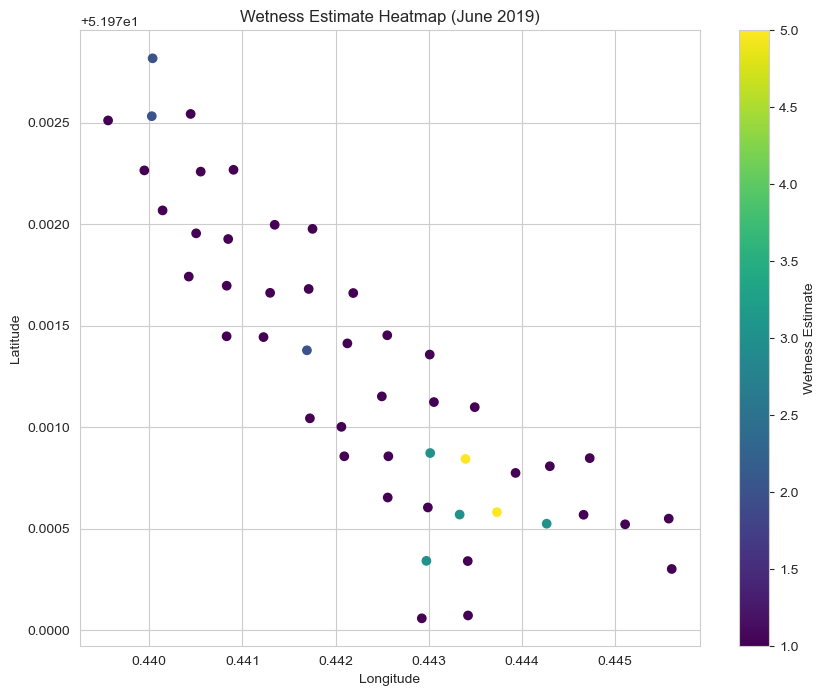

In [10]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df_june_2019['lon'], y=df_june_2019['lat'], c=df_june_2019['wetness_estimate'], cmap='viridis')
plt.colorbar(scatter, label='Wetness Estimate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wetness Estimate Heatmap (June 2019)')
plt.show()

In [11]:
# from IPython.display import display, clear_output, HTML
# import folium
# import matplotlib.pyplot as plt
# import matplotlib.colors
# import branca.colormap

# def update_map(year):
#     print(f"Updating map for year: {year}")

#     # Filter DataFrame for the selected year
#     year_data = yearly_data.get(year)
#     if year_data is not None:
#         print(f"Number of observations for {year}: {len(year_data)}")

#         # Remove all existing layers
#         for layer_year in list(layer_registry.keys()):
#             if layer_registry[layer_year] in m._children.values():
#                 for key, value in list(m._children.items()):
#                     if value == layer_registry[layer_year]:
#                         del m._children[key]
#                         break
#             del layer_registry[layer_year]

#         # Clear the layer control
#         if hasattr(m, 'layer_control'):
#             m.layer_control = None

#         # Create a new FeatureGroup for the current year
#         current_layer = folium.FeatureGroup(name=f"Markers {year}")
#         layer_registry[year] = current_layer

#         # Create color normalization
#         min_wetness = df['wetness_estimate'].min()
#         max_wetness = df['wetness_estimate'].max()
#         cmap = plt.get_cmap('viridis')
#         norm = matplotlib.colors.Normalize(vmin=min_wetness, vmax=max_wetness)

#         # Add CircleMarkers with colors based on wetness
#         for index, row in year_data.iterrows():
#             lat, lon, wetness = row['lat'], row['lon'], row['wetness_estimate']
            
#             # Calculate color using normalization
#             color_rgba = cmap(norm(wetness))
#             color_hex = matplotlib.colors.to_hex(color_rgba)

#             folium.CircleMarker(
#                 location=(lat, lon),
#                 radius=5,
#                 color=color_hex,
#                 fill=True,
#                 fill_color=color_hex,
#                 fill_opacity=0.6,
#                 tooltip=f"Wetness: {wetness}, Date: {row['date']}",
#             ).add_to(current_layer)

#         current_layer.add_to(m)
#         print(f"Layers added: {len(year_data)}")

#         # Update colormap
#         if 'colormap' in m._children:
#             del m._children['colormap']
        
#         colormap = branca.colormap.LinearColormap(
#             ['blue', 'yellow', 'red'],
#             vmin=min_wetness,
#             vmax=max_wetness
#         )
#         colormap.caption = f"Wetness Estimate ({year})"
#         colormap.add_to(m)

#         # Fit map bounds to the current year's data
#         m.fit_bounds(year_data[['lat', 'lon']].values.tolist())

#         # Add a new layer control
#         folium.LayerControl().add_to(m)

#     with output:
#         clear_output(wait=True)
#         display(m)

#     # Force a JavaScript update of the map
#     display(HTML("<script>document.getElementsByClassName('folium-map')[0]._leaflet_map.invalidateSize(true);</script>"))


In [12]:
# import folium
# import pandas as pd
# import ipywidgets as widgets
# from IPython.display import display, clear_output, HTML
# import matplotlib.pyplot as plt
# import matplotlib.colors
# import branca.colormap


# # Assuming your DataFrame is named 'df'
# print(widgets.__version__)

# # Convert 'date' to datetime
# df['date'] = pd.to_datetime(df['date'])

# # Filter out February 2019
# df = df[~((df['date'].dt.year == 2019) & (df['date'].dt.month == 2))]

# # Extract year
# df['year'] = df['date'].dt.year

# # Group data by year
# yearly_data = {year: group for year, group in df.groupby('year')}

# # Create the base map
# m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=16)

# # Create the dropdown menu
# years = sorted(list(yearly_data.keys()))
# year_dropdown = widgets.Dropdown(options=years, value=min(years), description="Year:")

# # Create layer registry
# layer_registry = {}

# # Create an Output widget for displaying the map
# output = widgets.Output()


# # Link the dropdown to the update function
# def on_year_change(change):
#     print("Dropdown value changed to:", change.new)
#     update_map(change.new)

# year_dropdown.observe(on_year_change, names='value')

# # Create the VBox layout
# vbox = widgets.VBox([year_dropdown, output])

# # Initialize the map with the first year
# update_map(year_dropdown.value)

# # Add LayerControl
# folium.LayerControl(autoZIndex=True, collapsed=False).add_to(m)

# # Display the VBox
# display(vbox)


In [13]:
import folium
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
from IPython.display import display, HTML

# Assuming your DataFrame is named 'df'

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter out February 2019
df = df[~((df['date'].dt.year == 2019) & (df['date'].dt.month == 2))]

# Extract year
df['year'] = df['date'].dt.year

# Group data by year
yearly_data = {year: group for year, group in df.groupby('year')}

# Get min and max wetness for color normalization
min_wetness = df['wetness_estimate'].min()
max_wetness = df['wetness_estimate'].max()
cmap = plt.get_cmap('viridis')
norm = colors.Normalize(vmin=min_wetness, vmax=max_wetness)

# Create and display the maps for each year
for year in sorted(yearly_data.keys()):
    year_data = yearly_data[year]

    # Create the Folium map
    m = folium.Map(
        location=[year_data['lat'].mean(), year_data['lon'].mean()],
        zoom_start=16,
        tiles='OpenStreetMap'  # You can change the tile provider if needed
    )

    # Add CircleMarkers for the current year
    for index, row in year_data.iterrows():
        lat, lon, wetness = row['lat'], row['lon'], row['wetness_estimate']
        color_rgba = cmap(norm(wetness))
        color_hex = colors.to_hex(color_rgba)
        folium.CircleMarker(
            location=(lat, lon),
            radius=5,
            color=color_hex,
            fill=True,
            fill_color=color_hex,
            fill_opacity=0.6,
            tooltip=f"Wetness: {wetness}, Date: {row['date']}",
        ).add_to(m)

    # Add a title to the map (as HTML)
    title_html = f'<h3 align="center" style="font-size:20px">Year: {year}</h3>'
    m.get_root().html.add_child(folium.Element(title_html))

    # Display the map directly
    display(HTML(m._repr_html_()))

In [14]:
import folium
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import branca.colormap as cm
import matplotlib.colors as colors

# Assuming your DataFrame is named 'df'

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter out February 2019
df = df[~((df['date'].dt.year == 2019) & (df['date'].dt.month == 2))]

# Extract year
df['year'] = df['date'].dt.year

# Group data by year
yearly_data = {year: group for year, group in df.groupby('year')}

# Define the colormap (blue to yellow)
min_wetness = df['wetness_estimate'].min()
max_wetness = df['wetness_estimate'].max()
colormap = cm.LinearColormap(['yellow', 'blue'], vmin=min_wetness, vmax=max_wetness)

# Create a list to store the Folium map HTML widgets
map_widgets = []

# Create and display the maps for each year
years = sorted(yearly_data.keys())
for i, year in enumerate(years):
    year_data = yearly_data[year]

    # Create the Folium map
    m = folium.Map(
        location=[year_data['lat'].mean(), year_data['lon'].mean()],
        zoom_start=16,
        tiles='OpenStreetMap'  # You can change the tile provider if needed
    )

    # Add CircleMarkers for the current year
    for index, row in year_data.iterrows():
        lat, lon, wetness = row['lat'], row['lon'], row['wetness_estimate']
        folium.CircleMarker(
            location=(lat, lon),
            radius=5,
            color=colormap(wetness),
            fill=True,
            fill_color=colormap(wetness),
            fill_opacity=0.6,
            tooltip=f"Wetness: {wetness}, Date: {row['date']}",
        ).add_to(m)

    # Add legend to the first map only
    if i == 0:
        colormap.caption = "Wetness Estimate"
        m.add_child(colormap)

    # Create an HTML widget to display the map
    map_html = widgets.HTML(
        f'<div style="height: 400px;">{m._repr_html_()}</div>',  # Adjusted height using CSS
        layout=widgets.Layout(width='100%')
    )

    # Create a Label widget for the year title
    year_label = widgets.Label(value=f"Year: {year}", style={'font_size': '16px', 'font_weight': 'bold'})

    # Create a VBox to arrange the year label and map
    year_vbox = widgets.VBox([year_label, map_html], layout=widgets.Layout(height='450px'))  # Adjusted height

    # Add the VBox to the list of map widgets
    map_widgets.append(year_vbox)

# Create rows using VBox
row1 = widgets.HBox(map_widgets[:2])
row2 = widgets.HBox(map_widgets[2:4])
row3 = widgets.HBox(map_widgets[4:6])

# Display the rows in a VBox
grid = widgets.VBox([row1, row2, row3])

# Display the grid
display(grid)

In [21]:
import pandas as pd
import plotly.graph_objects as go

# Filter for June 2024
df_june_2024 = df[(df['observation_date'].dt.year == 2024)]
df_june_2022 = df[(df['observation_date'].dt.year == 2022)]




# Create the Scatter3d trace for 2019
trace_2019 = go.Scatter3d(
    x=df_june_2019['lon'],
    y=df_june_2019['lat'],
    z=df_june_2019['ele'],
    mode='markers',
    marker=dict(
        size=5,
        # color=df_june_2024['ele'],
        # colorscale='Viridis',
        color='blue',
        opacity=0.8
    ),
    name='June 2019'  # Add a name for the legend
)
# Create the Scatter3d trace for 2019
trace_2022 = go.Scatter3d(
    x=df_june_2022['lon'],
    y=df_june_2022['lat'],
    z=df_june_2022['ele'],
    mode='markers',
    marker=dict(
        size=5,
        # color=df_june_2024['ele'],
        # colorscale='Viridis',
        color='green',
        opacity=0.8
    ),
    name='June 2022'  # Add a name for the legend
)

# Create the Scatter3d trace for 2024 (with a different color scale)
trace_2024 = go.Scatter3d(
    x=df_june_2024['lon'],
    y=df_june_2024['lat'],
    z=df_june_2024['ele'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        # color=df_june_2024['ele'],
        # colorscale='Plasma',  # Use a different color scale (e.g., 'Plasma')
        opacity=0.8
    ),
    name='June 2024'  # Add a name for the legend
)

# Create the Figure and add both traces
fig = go.Figure(data=[trace_2019, trace_2022, trace_2024])

# Update the layout
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Elevation',
        aspectratio=dict(x=1, y=1, z=0.7)
    ),
    title='3D Elevation Comparison (June 2019 vs. June 2024)',
    legend=dict(x=0, y=1) # Place legend in the top left.
)

# Show the map
fig.show()

